In [41]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# Loading the data into pandas
df = pd.read_csv('german_data_train.csv')
numdf = pd.read_csv('german_num_data_train.csv')

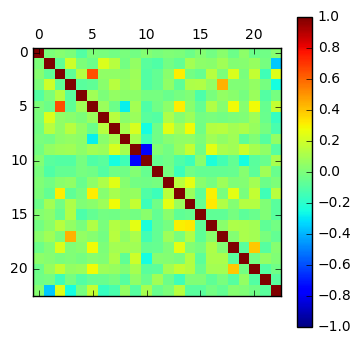

In [43]:
# Creating a correlation matrix to see variables are the most correlated to each other
correlations = numdf.corr()
cax = plt.matshow(correlations, vmin=-1, vmax=1)
plt.colorbar(cax)
plt.figure(figsize=(15, 15))
plt.show()

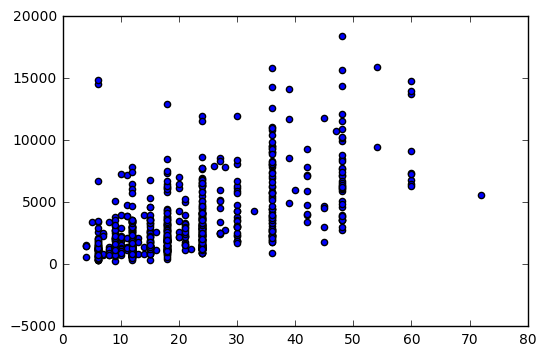

In [44]:
# Creating a scatter plot to show the relationship between duration and credit amount
x = df['duration(months)']
y = df['credit_amount']
plt.scatter(x, y)
plt.show()

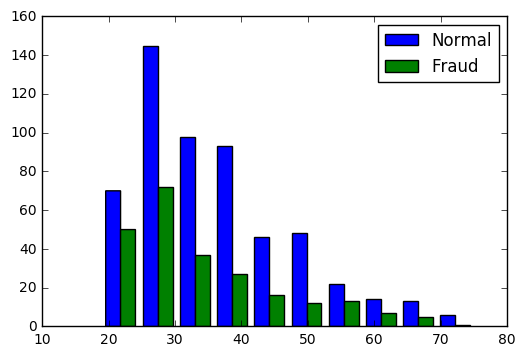

In [45]:
# Histogram showing the distribution of ages comparing normal activity to fraudulent activity
x = df[df['fraud'] == 1]['age']
y = df[df['fraud'] == 2]['age']
plt.hist([x, y], label=['Normal', 'Fraud'])
plt.legend()
plt.show()

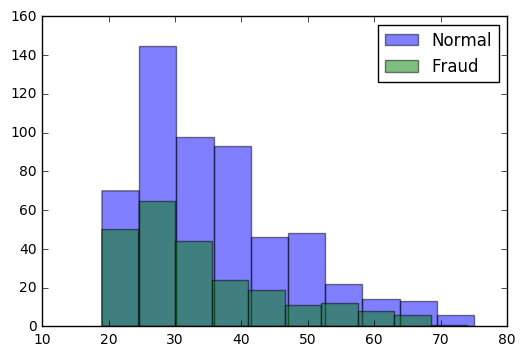

In [46]:
# Same histogram as about except they overlap instead of being side to side
x = df[df['fraud'] == 1]['age']
y = df[df['fraud'] == 2]['age']
plt.hist(x, alpha=0.5, label='Normal')
plt.hist(y, alpha=0.5, label='Fraud')
plt.legend()
plt.show()

In [47]:
# Text based correlation  
print(df.corr())

                  Unnamed: 0  duration(months)  credit_amount  \
Unnamed: 0          1.000000          0.037117       0.001772   
duration(months)    0.037117          1.000000       0.619350   
credit_amount       0.001772          0.619350       1.000000   
installment_rate    0.034098          0.073130      -0.285533   
residence           0.009246          0.021135       0.010142   
age                -0.044159         -0.031034       0.041748   
existing_credits   -0.010952         -0.026905      -0.003384   
people_liable       0.026724         -0.027220       0.017813   
fraud               0.066773          0.244485       0.165173   

                  installment_rate  residence       age  existing_credits  \
Unnamed: 0                0.034098   0.009246 -0.044159         -0.010952   
duration(months)          0.073130   0.021135 -0.031034         -0.026905   
credit_amount            -0.285533   0.010142  0.041748         -0.003384   
installment_rate          1.000000   0.07